Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1250 - loss: 25.1630 - val_accuracy: 0.5000 - val_loss: 882.8312
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3125 - loss: 573.7092 - val_accuracy: 0.0000e+00 - val_loss: 1186.1475
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3125 - loss: 560.2565 - val_accuracy: 0.2500 - val_loss: 563.3071
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 170.4348 - val_accuracy: 0.2500 - val_loss: 153.7191
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step - accuracy: 0.8750 - loss: 22.4110 - val_accuracy: 0.2500 - val_loss: 110.5471
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step - accuracy: 0.8125 - loss: 53.9426 - val_accuracy: 0.5000 - val_loss: 48.4035
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8750 - loss: 52.7206 - val_accuracy: 0.7500 - val_loss: 43.8348
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - accuracy: 0.8750 - loss: 50.9804 - val_accuracy: 0.750

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.75
Precision: 1.0
Recall: 0.75
F1-score: 0.8333333333333333


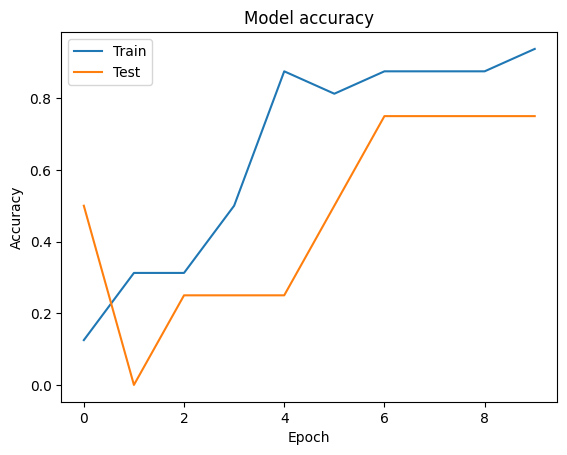

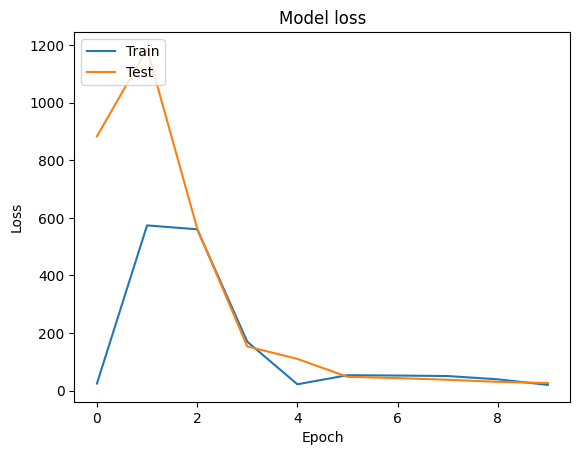

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


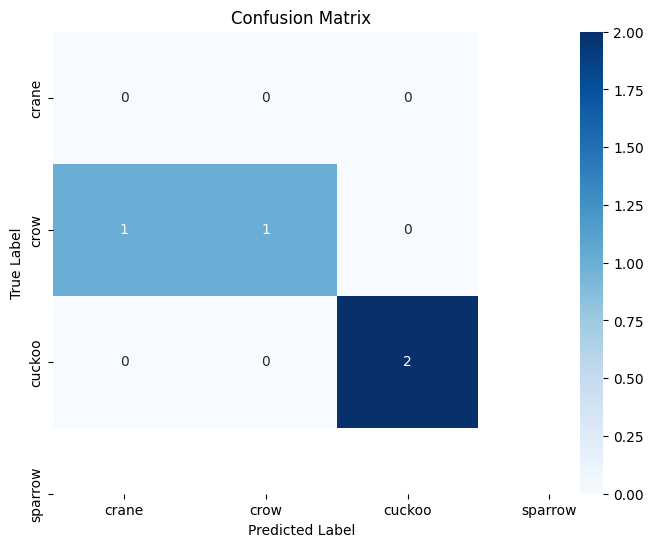

Classification Report:
               precision    recall  f1-score   support

        crow       0.00      0.00      0.00         0
      cuckoo       1.00      0.50      0.67         2
     sparrow       1.00      1.00      1.00         2

    accuracy                           0.75         4
   macro avg       0.67      0.50      0.56         4
weighted avg       1.00      0.75      0.83         4

Accuracy: 0.75
Precision: 1.0
Recall: 0.75
F1-score: 0.8333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefin

In [ ]:
import tensorflow as tf
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to extract audio features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return mfcc.T

# Load data and labels
audio_files = ["/content/sample_data/cuckoo.mp3","/content/sample_data/cuckoo2.mp3","/content/sample_data/cuckoo3.mp3","/content/sample_data/cuckoo4.mp3","/content/sample_data/cuckoo5.mp3", "/content/sample_data/crane.wav","/content/sample_data/crane2.mp3","/content/sample_data/crane3.mp3","/content/sample_data/crane4.mp3","/content/sample_data/crane5.mp3", "/content/sample_data/crow.mp3", "/content/sample_data/crow2.mp3", "/content/sample_data/crow3.mp3", "/content/sample_data/crow4.mp3", "/content/sample_data/crow5.mp3", "/content/sample_data/hs.wav", "/content/sample_data/hs2.wav", "/content/sample_data/hs3.mp3", "/content/sample_data/hs4.mp3", "/content/sample_data/hs5.wav"]
labels = ["cuckoo","cuckoo","cuckoo","cuckoo","cuckoo", "crane","crane","crane","crane","crane", "crow", "crow", "crow", "crow", "crow", "sparrow", "sparrow", "sparrow", "sparrow", "sparrow"]

# Extract features and ensure consistent shape
X = []
for file in audio_files:
    features = extract_features(file)
    X.append(features)
# Pad the features to have the same shape
max_length = max(feature.shape[0] for feature in X)
X = [np.pad(feature, ((0, max_length - feature.shape[0]), (0, 0))) for feature in X]
X = np.array(X)

y = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Confusion matrix
y_conf = model.predict(X_test)
y_conf_classes = np.argmax(y_conf, axis=1)

conf_matrix = confusion_matrix(y_test, y_conf_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
unique_classes = np.unique(np.concatenate((y_test, y_conf_classes)))
target_names = [label_encoder.classes_[i] for i in unique_classes]
class_report = classification_report(y_test, y_conf_classes, target_names=target_names)
print("Classification Report:\n", class_report)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Input crow and predict
# crow_features = extract_features("/content/sample_data/cuckoo.mp3")
# crow_features = np.pad(crow_features, ((0, max_length - crow_features.shape[0]), (0, 0)))
# crow_features = crow_features.reshape(1, crow_features.shape[0], crow_features.shape[1])

# prediction = model.predict(crow_features)
# predicted_class = label_encoder.inverse_transform(np.argmax(prediction, axis=1))

# print("Predicted class for crow.mp3:", predicted_class[0])